In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import random
import torch

SEED = 100

if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")

print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")

PyTorch version: 2.9.0+cu128
Device: cuda


In [2]:
df_train = pd.read_csv('pirate_pain_train.csv')

float_cols = df_train.select_dtypes(include=['float64']).columns
for col in float_cols:
    df_train[col] = df_train[col].astype(np.float32)

df_train.head()


,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
0,0,0,2,0,2,1,two,two,two,1.094705,...,3.499558e-06,1.945042e-06,0.000004,1.153299e-05,0.000004,0.017592,0.013508,0.026798,0.027815,0.5
1,0,1,2,2,2,2,two,two,two,1.135183,...,3.976952e-07,6.765108e-07,0.000006,4.643774e-08,0.000000,0.013352,0.000000,0.013377,0.013716,0.5
2,0,2,2,0,2,2,two,two,two,1.080745,...,1.533820e-07,1.698525e-07,0.000001,2.424536e-06,0.000003,0.016225,0.008110,0.024097,0.023105,0.5
3,0,3,2,2,2,2,two,two,two,0.938017,...,1.006865e-05,5.511079e-07,0.000002,5.432416e-08,0.000000,0.011832,0.007450,0.028613,0.024648,0.5
4,0,4,2,2,2,2,two,two,two,1.090185,...,4.437265e-06,1.735459e-07,0.000002,5.825366e-08,0.000007,0.005360,0.002532,0.033026,0.025328,0.5


In [3]:
counts = df_train.groupby('sample_index')['time'].count().reset_index(name='n_timestamps')
counts = counts.sort_values('sample_index')  

avg_ts = counts['n_timestamps'].mean()
print(f"Average number of timestamps per sample_index: {avg_ts:.2f}")

print(counts)

Average number of timestamps per sample_index: 160.00
     sample_index  n_timestamps
0               0           160
1               1           160
2               2           160
3               3           160
4               4           160
..            ...           ...
656           656           160
657           657           160
658           658           160
659           659           160
660           660           160

[661 rows x 2 columns]


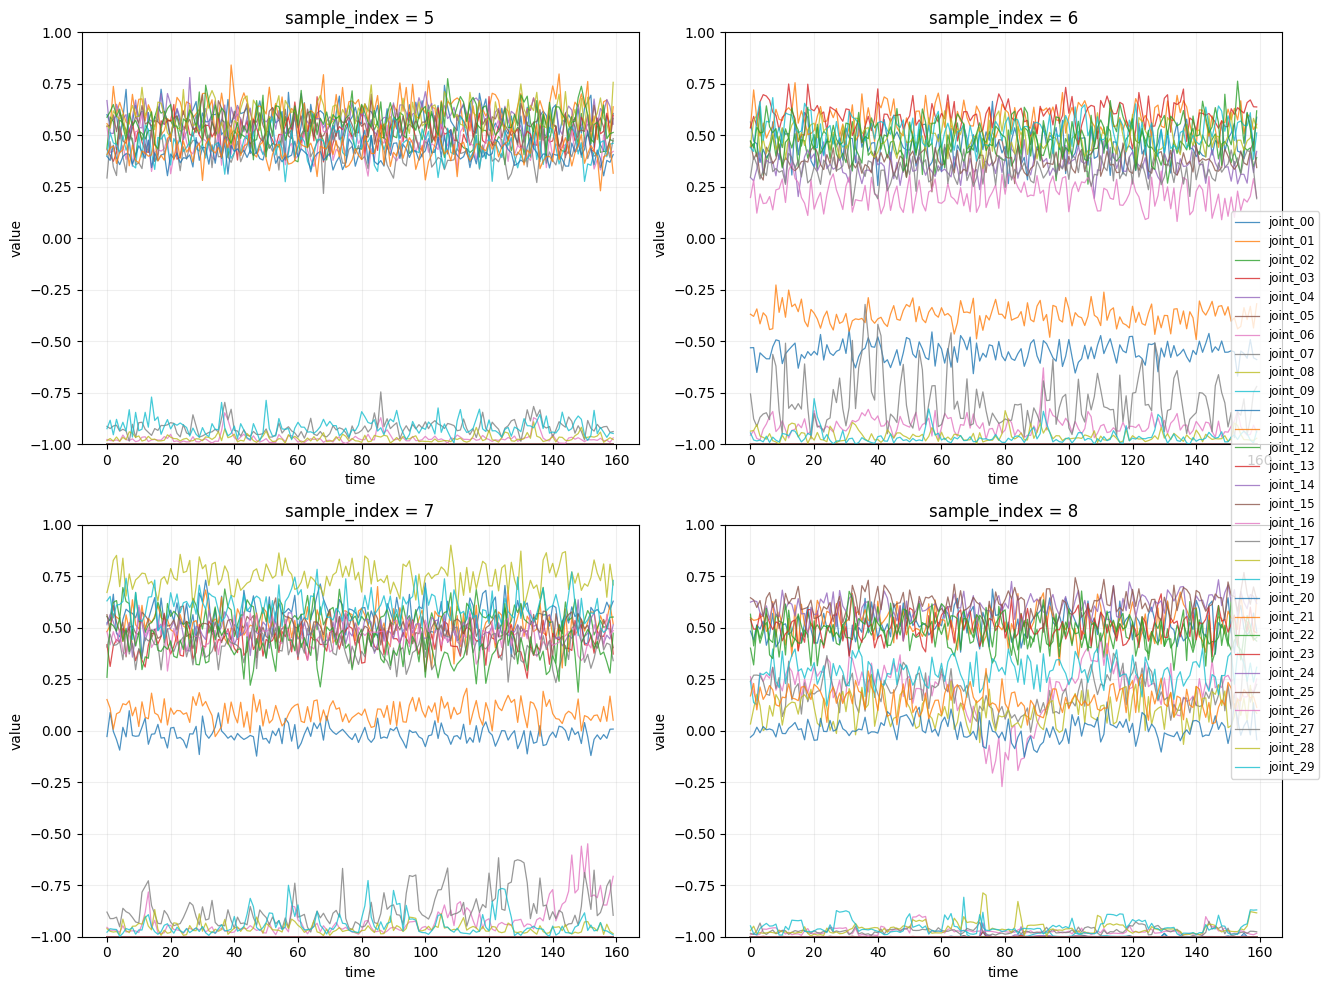

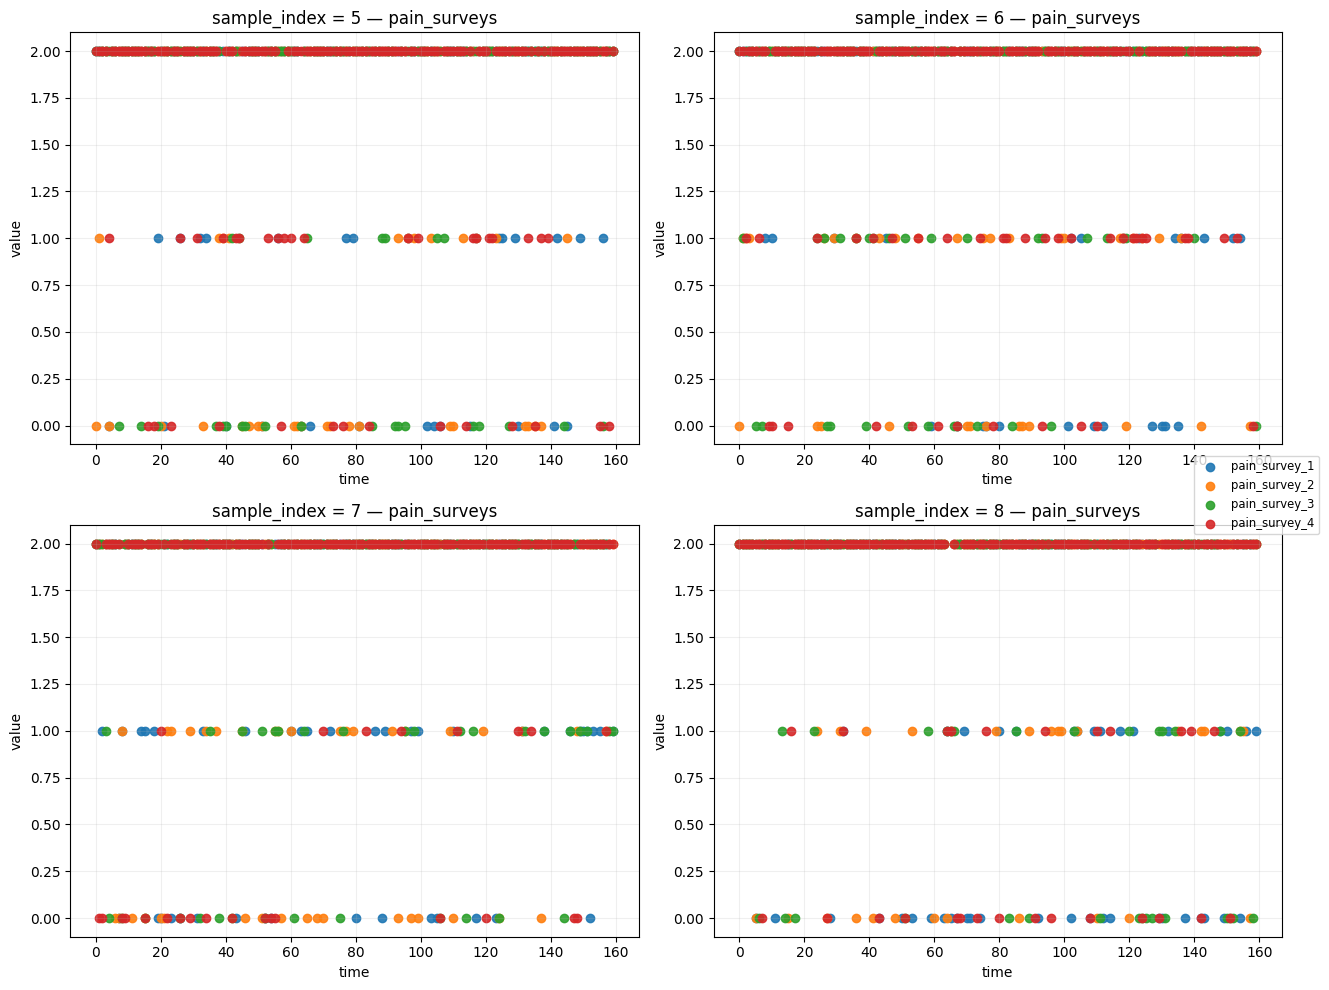

In [4]:
unique_sids = df_train['sample_index'].unique()

idxs = [5, 6, 7, 8]
sample_ids = unique_sids[idxs]

joint_cols = [c for c in df_train.columns if c.startswith('joint_')]

df_train[joint_cols] = 2 * ((df_train[joint_cols] - df_train[joint_cols].min()) / (df_train[joint_cols].max() - df_train[joint_cols].min())) - 1
n_plot = min(len(joint_cols), 30)  


fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=False)
axes = axes.flatten()
for ax, sid in zip(axes, sample_ids):
    sub = df_train[df_train['sample_index'] == sid].sort_values('time')
    for j in joint_cols[:n_plot]:
        ax.plot(sub['time'], sub[j], label=j, linewidth=0.9, alpha=0.8)
    ax.set_title(f'sample_index = {sid}')
    ax.set_xlabel('time')
    ax.set_ylabel('value')
    ax.set_ylim(-1, 1) 
    ax.grid(alpha=0.2)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(0.95, 0.5), ncol=1, fontsize='small')
plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()



pain_cols = [c for c in df_train.columns if c.startswith('pain_survey_')]
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=False)
axes = axes.flatten()
for ax, sid in zip(axes, sample_ids):
    sub = df_train[df_train['sample_index'] == sid].sort_values('time')
    for p in pain_cols:
        ax.scatter(sub['time'], sub[p], label=p, linewidth=1.0, alpha=0.9)
    ax.set_title(f'sample_index = {sid} — pain_surveys')
    ax.set_xlabel('time')
    ax.set_ylabel('value')
    ax.grid(alpha=0.2)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(0.95, 0.5), fontsize='small')
plt.tight_layout(rect=[0, 0, 0.93, 1])
plt.show()
